[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Dimensionality Reduction - Kernel PCA


> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0065DimensionalityReductionKPCA.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA, PCA

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotScatterData


In [5]:
# General Auxiliary Functions


## Dimensionality Reduction by Kernel - PCA

The Kernel PCA is a specific case of applying non linear transformation on the features and then applying the PCA transform.  
Utilizing the _Kernel Trick_ in the PCA framework allows an efficient computation of the transforms which can be defined by a _kernel_.

This notebook demonstrates a simple use case of the Kernel PCA.

In [6]:
# Parameters

# Data 
numCircles0 = 350
numCircles1 = 350
noiseLevel  = 0.01

# Model
kernelType  = 'rbf'
γ           = 10.0
α           = 0.1
numComp     = 2


## Generate / Load Data

Generating concentric circles.


In [7]:
# Generate Data
numCircles = numCircles0 + numCircles1
mX, vY     = make_circles((numCircles0, numCircles1), factor = 0.2, shuffle = False, noise = noiseLevel, random_state = seedNum)

numSamples = np.size(mX, 0)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (700, 2)
The labels data shape: (700,)


### Plot Data

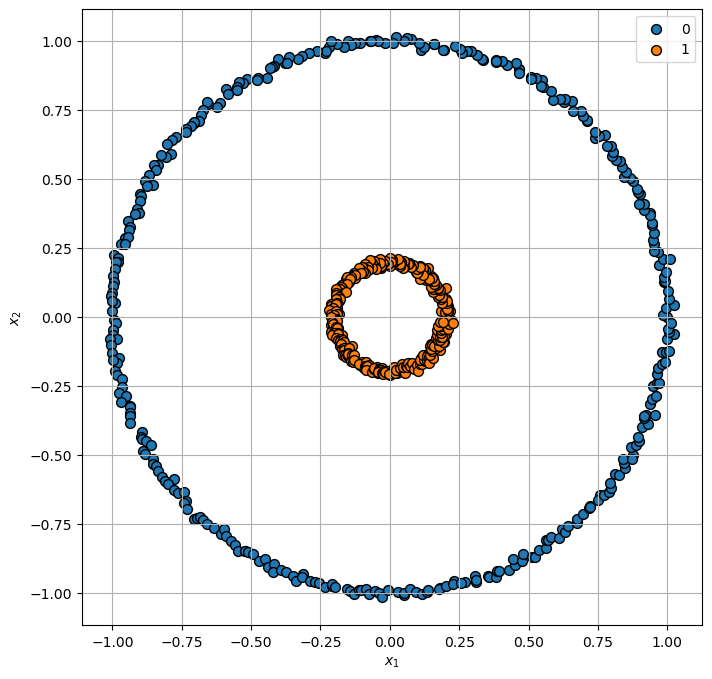

In [8]:
# Plot the Data

hF, hA = plt.subplots(figsize = (8, 8))
hA = PlotScatterData(mX, vY, hA)

## Applying Dimensionality Reduction - Kernel PCA 

The Kernel-PCA is usually a framework used by other facilitators (MDS / IsoMap).  
This section demonstrate the use of the _Polynomial Kernel_ on the simple dataset.


In [9]:
# Applying the PCA Model

oPCA = PCA(n_components = numComp)
oPCA = oPCA.fit(mX)


In [10]:
# Applying the PCA Model

oKPCA = KernelPCA(n_components = numComp, kernel = kernelType, gamma = γ, fit_inverse_transform = True, alpha = α)
oKPCA = oKPCA.fit(mX)

### Projection of the Data

Projection of the data: $\mathbb{R}^{2} \to \mathbb{R}^{2}$.

In [11]:
# Projection

mXPca   = oPCA.transform(mX)
mXKPca  = oKPCA.transform(mX)

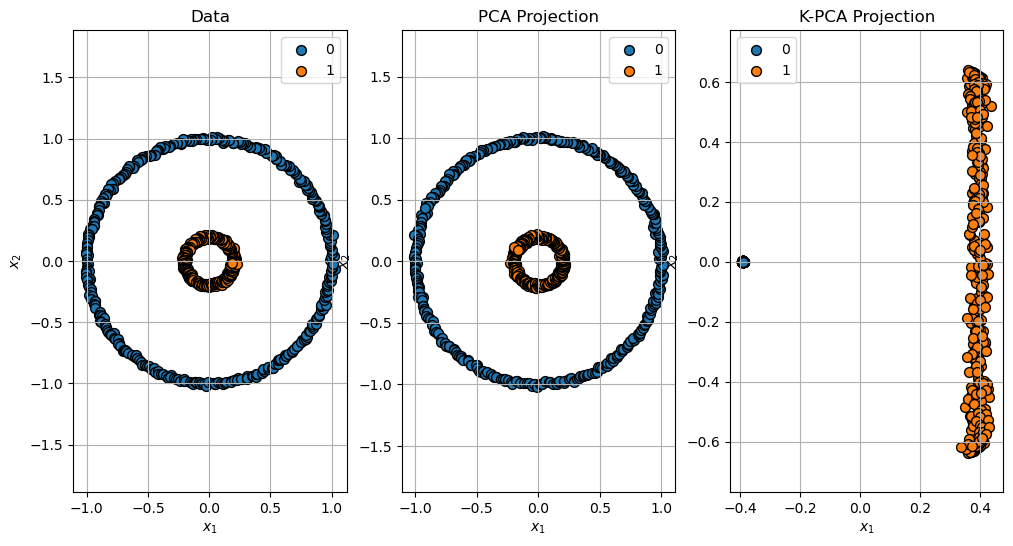

In [12]:
# Plot the Projection

hF, hA = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
hA[0] = PlotScatterData(mX, vY, hA[0])
hA[0].set_title('Data')
hA[0].axis('equal')
hA[1] = PlotScatterData(mXPca, vY, hA[1])
hA[1].set_title('PCA Projection')
hA[1].axis('equal')
hA[2] = PlotScatterData(mXKPca, vY, hA[2])
hA[2].set_title('K-PCA Projection')
hA[2].axis('equal')

plt.show()


### Reconstruction of the Data

In [13]:
# Reconstruction

mXPcaRec   = oPCA.inverse_transform(mXPca)
mXKPcaRec  = oKPCA.inverse_transform(mXKPca)

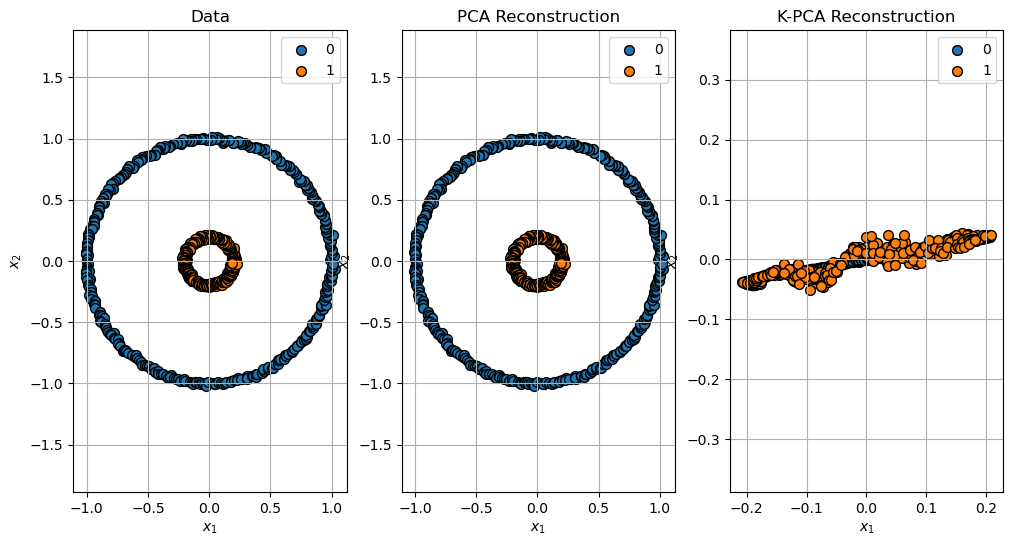

In [14]:
# Plot the Reconstruction

hF, hA = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 6))
hA[0] = PlotScatterData(mX, vY, hA[0])
hA[0].set_title('Data')
hA[0].axis('equal')
hA[1] = PlotScatterData(mXPcaRec, vY, hA[1])
hA[1].set_title('PCA Reconstruction')
hA[1].axis('equal')
hA[2] = PlotScatterData(mXKPcaRec, vY, hA[2])
hA[2].set_title('K-PCA Reconstruction')
hA[2].axis('equal')

plt.show()

* <font color='red'>(**?**)</font> Explain the reconstruction error of the _K-PCA_. You may read about the `fit_inverse_transform` parameter.